# Data prepraration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model 

import warnings
warnings.filterwarnings("ignore")

import math

color_pal=sns.color_palette()

In [ ]:
df=pd.read_csv('BTC-Daily.csv')
df=df.drop(['unix','symbol','open','high','low','Volume BTC','Volume USD'],axis=1)
df.date=pd.to_datetime(df.date,
                        infer_datetime_format=True)
df = df.sort_values(by="date")
df.index=df['date']
df=df.drop(['date'],axis=1)

In [ ]:
df

,close
date,
2014-11-28,376.28
2014-11-29,376.72
2014-11-30,373.34
2014-12-01,378.39
2014-12-02,379.25
...,...
2022-02-25,39231.64
2022-02-26,39146.66
2022-02-27,37712.68


In [ ]:
test = df.loc[(df.index >= '10-01-2021')]
test

,close
date,
2021-10-01,48171.86
2021-10-02,47685.80
2021-10-03,48235.93
2021-10-04,49242.14
2021-10-05,51501.19
...,...
2022-02-25,39231.64
2022-02-26,39146.66
2022-02-27,37712.68


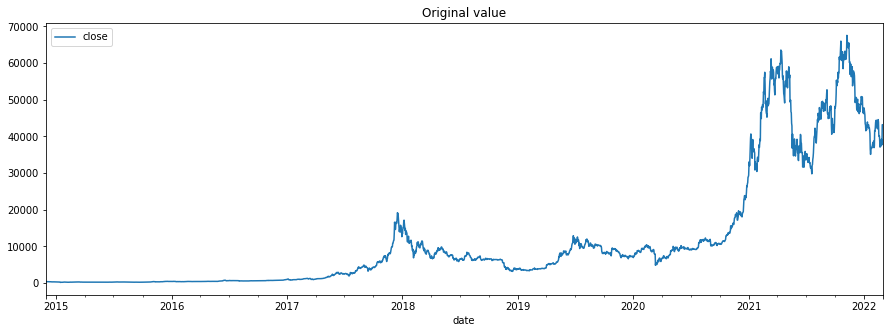

In [ ]:
df.plot(figsize=(15,5),
        color=color_pal,title='Original value')
plt.show()

## Train split value

In [ ]:
import pandas as pd
import datetime

datelist = pd.date_range(start="2022-03-02",end="2022-04-01")

In [ ]:
df2 = pd.DataFrame(datelist)
df2=df2.rename(columns={0:'date'})

In [ ]:
df=pd.read_csv('BTC-Daily.csv')
df=df.drop(['unix','symbol','open','high','low','Volume BTC','Volume USD'],axis=1)
df.date=pd.to_datetime(df.date,
                        infer_datetime_format=True)

df = pd.concat([df, df2], ignore_index = True)
df.date=pd.to_datetime(df.date,
                        infer_datetime_format=True)
df=df.sort_values(by='date')
df.reset_index()
df.index=df['date']
df=df.drop('date',axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

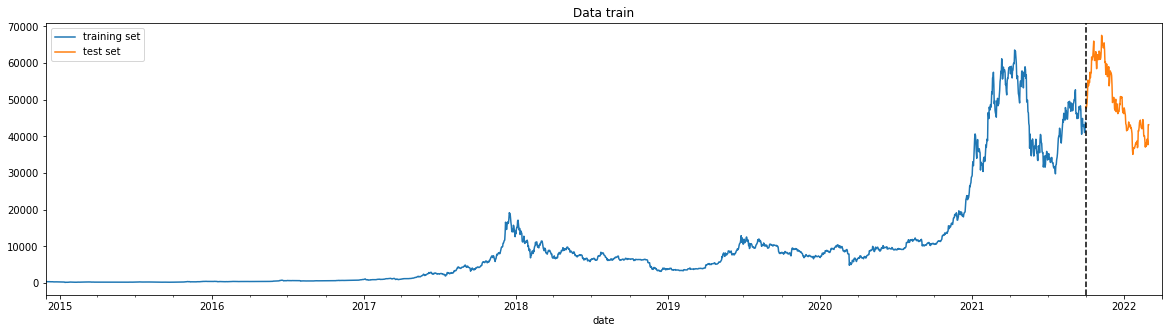

In [ ]:
train = df.loc[df.index < '10-01-2021']
test = df.loc[(df.index >= '10-01-2021')]

y_actual=np.array(test.close)
y_actual = y_actual[~np.isnan(y_actual)]

fig,ax = plt.subplots(figsize=(20,5))
train.plot(ax=ax, label='Training set',title='Data train')
test.plot(ax=ax,label='Test set')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['training set','test set'])
plt.show

## Model value accuracy

In [ ]:
def valueAcc():
  sum=0
  count=0
  num = np.arange(0, len(test),1)
  for i in num:
    close=test['close'].iloc[i]
    predict=test['predict'].iloc[i]
    if (close is not None):
      if(close>predict):
        per=predict/(close/100)
        sum=sum+per
        count=count+1
      elif(close<predict):
        predict=close-(predict-close)
        per=predict/(close/100)
        sum=sum+per
        count=count+1
      else:
        sum=sum+100
        count=count+1
  correctness=sum/count
  correct=str(correctness)
  print('The accuracy value of Linear model is '+correct+" %")

## Model trend accuracy

In [ ]:
def trendAcc():
  sum=0
  count=0
  num = np.arange(1, len(test),1)
  for i in num:
    diffClose=test['close'].iloc[i]-test['close'].iloc[i-1]
    diffPredict=test['predict'].iloc[i]-test['predict'].iloc[i-1]
    if (diffClose is not None):
      if((diffClose>=0) and (diffPredict>=0)):
        closePer=diffClose/(test['close'].iloc[i-1]/100)
        predictPer=diffPredict/(test['predict'].iloc[i-1]/100)
        per=math.exp(-abs(predictPer-closePer)/closePer)
        #Exp[(-Abs[Actual - Ideal]/Ideal)]
        sum=sum+per
        count=count+1
      elif((diffClose<0)and(diffPredict<0)):
        diffClose=diffClose*(-1)
        diffPredict=diffPredict*(-1)
        closePer=diffClose/(test['close'].iloc[i-1]/100)
        predictPer=diffPredict/(test['predict'].iloc[i-1]/100)
        per=math.exp(-abs(predictPer-closePer)/closePer)
        sum=sum+per
        count=count+1
      elif((diffClose>=0)and(diffPredict<0)):
        diffPredict=diffPredict*(-1)
        closePer=diffClose/(test['close'].iloc[i-1]/100)
        predictPer=diffPredict/(test['predict'].iloc[i-1]/100)
        per=math.exp(-abs(predictPer-closePer)/closePer)
        sum=sum+per
        count=count+1
      elif((diffPredict>=0)and(diffClose<0)):
        diffClose=diffClose*(-1)
        closePer=diffClose/(test['close'].iloc[i-1]/100)
        predictPer=diffPredict/(test['predict'].iloc[i-1]/100)
        per=math.exp(-abs(predictPer-closePer)/closePer)
        sum=sum+per
        count=count+1
  correctness=sum/count
  correct=str(correctness*100)
  print('The accuracy trend of Linear model is '+correct+" %")

## Linear Regression

In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
x=train[['year','month','date']]
y=train['close']
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     959.3
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:27:07   Log-Likelihood:                -26349.
No. Observations:                2499   AIC:                         5.271e+04
Df Residuals:                    2495   BIC:                         5.273e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e+07   1.88e+05    -53.308      0.0

In [ ]:
test['year']=test.index.year
test['month']=test.index.month
test['date']=test.index.day
testdf=test.drop(['close'],axis=1)
testdf = testdf.loc[testdf.index >= '10-01-2021']
predict=reg.predict(testdf)
test['predict']=predict.tolist()

<function matplotlib.pyplot.show(*args, **kw)>

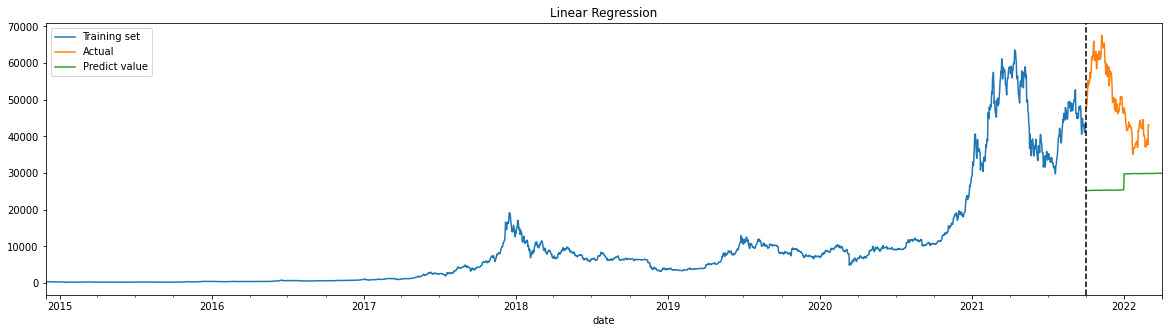

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Linear Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

25364.42931334241


In [ ]:
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

In [ ]:
 print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 43.36 %


In [ ]:
valueAcc()

The accuracy value of Linear model is 63.98806800664855 %


In [ ]:
trendAcc()

The accuracy trend of Linear model is 37.55540368834977 %


## Non-Linear Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
test=test.drop(['predict'],axis=1)
x=train[['year','month','date']]
y=train['close']
clf = RandomForestRegressor()
clf.fit(x,y)

RandomForestRegressor()

In [ ]:
test['year']=test.index.year
test['month']=test.index.month
test['date']=test.index.day
testdf=test.drop(['close'],axis=1)
testdf = testdf.loc[testdf.index >= '10-01-2021']
predict=clf.predict(testdf)
test['predict']=predict.tolist()

<function matplotlib.pyplot.show(*args, **kw)>

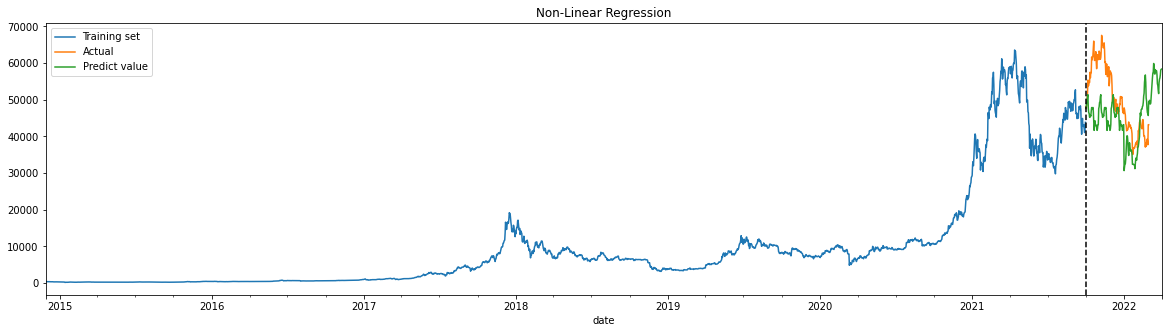

In [ ]:
test['predict']=predict.tolist()
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Non-Linear Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10778.75675192757


In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 16.99 %


In [ ]:
valueAcc()

The accuracy value of Linear model is 85.89032886751244 %


In [ ]:
trendAcc()

The accuracy trend of Linear model is 43.15691660580313 %


## Boosting model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
test=test.drop(['predict'],axis=1)
x=train[['year','month','date']]
y=train['close']

In [ ]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
xg_reg.fit(x, y)

[01:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

In [ ]:
test['year']=test.index.year
test['month']=test.index.month
test['date']=test.index.day
testdf=test.drop(['close'],axis=1)
testdf = testdf.loc[testdf.index >= '10-01-2021']
predict=xg_reg.predict(testdf)
test['predict']=predict.tolist()

<function matplotlib.pyplot.show(*args, **kw)>

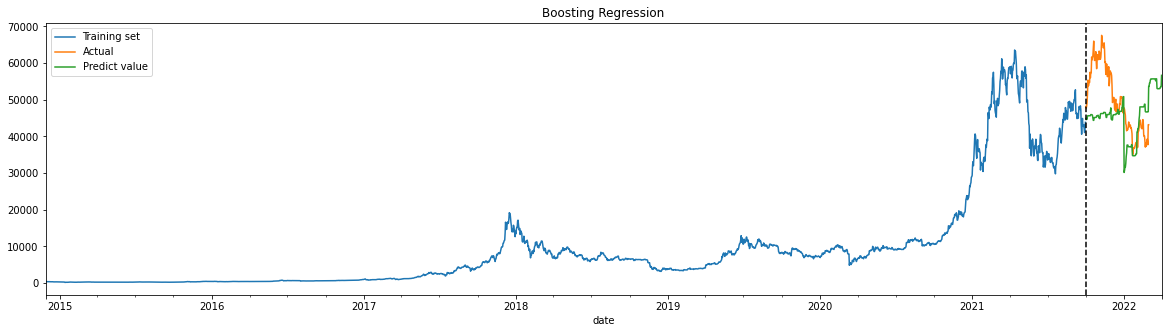

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Boosting Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10256.942872110189


In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 15.91 %


In [ ]:
valueAcc()

The accuracy value of Linear model is 86.78171761256002 %


In [ ]:
trendAcc()

The accuracy trend of Linear model is 40.865107266831885 %


## Arima model

In [ ]:
dfari=pd.read_csv('BTC-Daily.csv')
dfari=dfari.drop(['unix','symbol','open','high','low','Volume BTC','Volume USD'],axis=1)
dfari.date=pd.to_datetime(dfari.date,
                        infer_datetime_format=True)
dfari = dfari.sort_values(by="date")
dfari.index=dfari['date']
dfari=dfari.drop(['date'],axis=1)

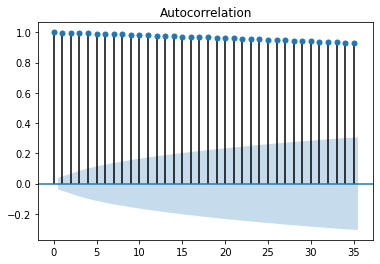

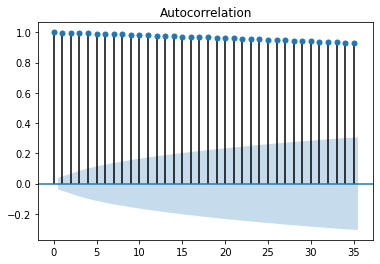

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dfari.close)

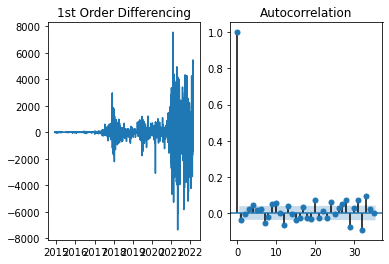

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(dfari.close.diff())

ax2=f.add_subplot(122)
plot_acf(dfari.close.diff().dropna(), ax=ax2)
plt.show()

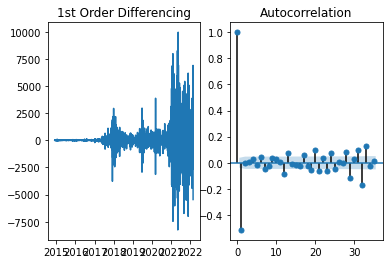

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(dfari.close.diff().diff())

ax2=f.add_subplot(122)
plot_acf(dfari.close.diff().diff().dropna(), ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y.close.dropna())
print('p-value: ',result[1])

result = adfuller(y.close.diff().dropna())
print('p-value: ',result[1])

result = adfuller(y.close.diff().diff().dropna())
print('p-value: ',result[1])

AttributeError: ignored

As we can see after 1 diff p-value drop beyond the acceptable threshold. So we're gonna consider d=1

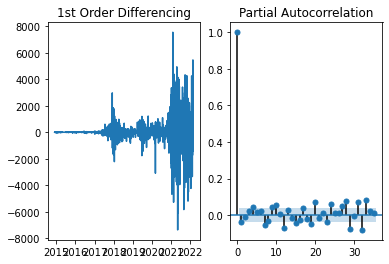

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(dfari.close.diff())

ax2=f.add_subplot(122)
plot_pacf(dfari.close.diff().dropna(), ax=ax2)
plt.show()

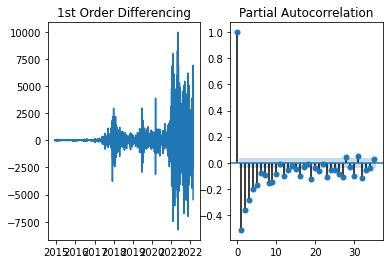

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(dfari.close.diff().diff())

ax2=f.add_subplot(122)
plot_pacf(dfari.close.diff().diff().dropna(), ax=ax2)
plt.show()

as we can see throught Pacf we can see the 1st lag is the most significant 
=> p=1

based on the Acf plot we can see the 1st spike is the most significant so => q=1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima_model=ARIMA(y,order=(1,1,1))
model=arima_model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2498
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19920.178
Method:                       css-mle   S.D. of innovations            703.109
Date:                Tue, 03 Jan 2023   AIC                          39848.357
Time:                        01:57:04   BIC                          39871.650
Sample:                    11-29-2014   HQIC                         39856.813
                         - 09-30-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3968     13.406      1.298      0.194      -8.879      43.672
ar.L1.D.close    -0.3264      0.246     -1.327      0.184      -0.808       0.156
ma.L1.D.close     0.2640      0.251     

In [ ]:
forecast = model.predict(start = 0+1,
                           end=len(df),
                           typ='levels')

In [ ]:
testdf=df
testdf['predict']=forecast.tolist()
predictvalue = testdf.loc[testdf.index >= '10-01-2021']
predictvalue = predictvalue.drop('close',axis=1)
test['predict']=predictvalue['predict']

<function matplotlib.pyplot.show(*args, **kw)>

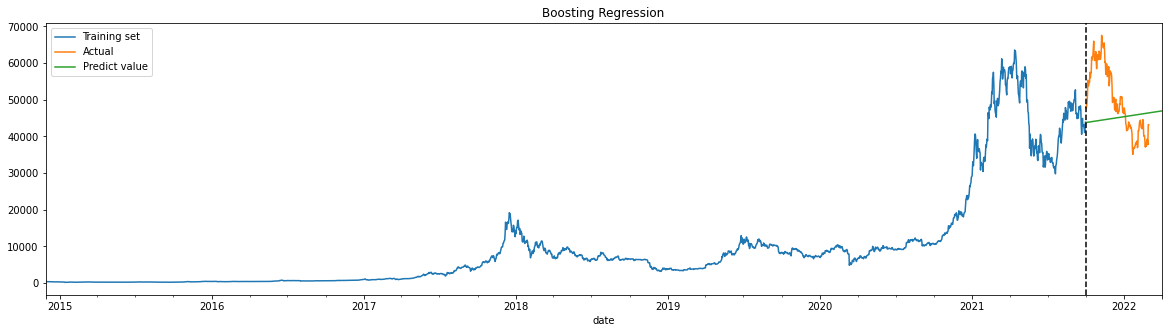

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Boosting Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10805.55009136606


In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 16.79 %


##Nneatar model

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day

x_train=train[['year','month','date']]
y_train=train['close']
x_test=train[['year','month','date']]
y_test=train['close']

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=3,random_state=1, max_iter=500).fit(x, y)

In [ ]:
testdf1=testdf.drop(['close','predict'],axis=1)

In [ ]:
testdf1
testdf1['year']=testdf1.index.year
testdf1['month']=testdf1.index.month
testdf1['date']=testdf1.index.day

In [ ]:
predict=regr.predict(testdf1)

## Sarimax model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 44.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
test=test.drop(['predict'],axis=1)
x=train[['year','month','date']]
y=train['close']

In [ ]:
"""
Sarimax_model = auto_arima(y,
                       start_P=1,
                       start_q=1,
                       max_p=5,
                       max_q=5,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()
"""

"\nSarimax_model = auto_arima(y,\n                       start_P=1,\n                       start_q=1,\n                       max_p=5,\n                       max_q=5,\n                       m=12,\n                       seasonal=True,\n                       d=None,\n                       D=1,\n                       trace=True,\n                       error_action='ignore',\n                       suppress_warnings=True,\n                       stepwise=True)\nSarimax_model.summary()\n"

Base on the funtion we can see that ARIMA(2,0,0)(1,1,1,12) is the best model for our prediction

In [ ]:
model = SARIMAX(y,order=(2, 0, 0),
              seasonal_order=(1, 1, 1, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = results.predict(start = 0+1,
                           end=len(df),
                           typ='levels')

In [ ]:
testdf=df
testdf['predict']=forecast.tolist()
predictvalue = testdf.loc[testdf.index >= '10-01-2021']
predictvalue = predictvalue.drop('close',axis=1)
test['predict']=predictvalue['predict']

<function matplotlib.pyplot.show(*args, **kw)>

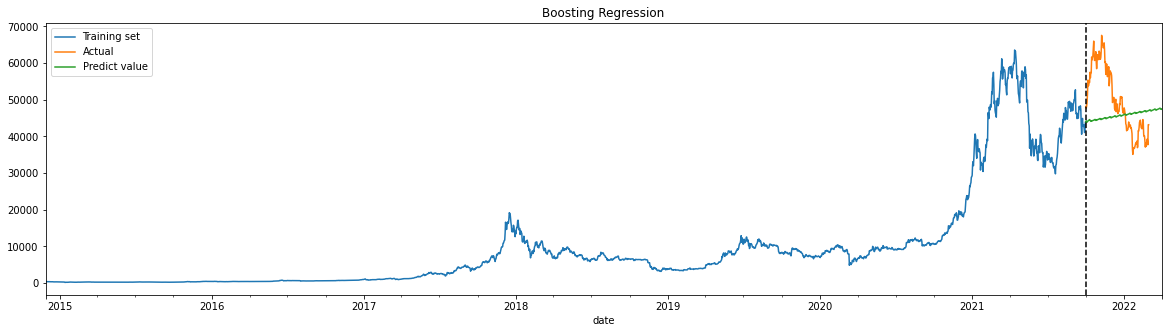

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Boosting Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10689.656921295324


In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 16.85 %


In [ ]:
valueAcc()

The accuracy value of Linear model is 86.00398866468025 %


In [ ]:
trendAcc()

The accuracy trend of Linear model is 43.29885011750804 %


try (3, 0, 0)(2, 1, 0, 12)

In [ ]:
model = SARIMAX(y,order=(3, 0, 0),
              seasonal_order=(2, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = results.predict(start = 0+1,
                           end=len(df),
                           typ='levels')

In [ ]:
testdf=df
testdf['predict']=forecast.tolist()
predictvalue = testdf.loc[testdf.index >= '10-01-2021']
predictvalue = predictvalue.drop('close',axis=1)
test['predict']=predictvalue['predict']

<function matplotlib.pyplot.show(*args, **kw)>

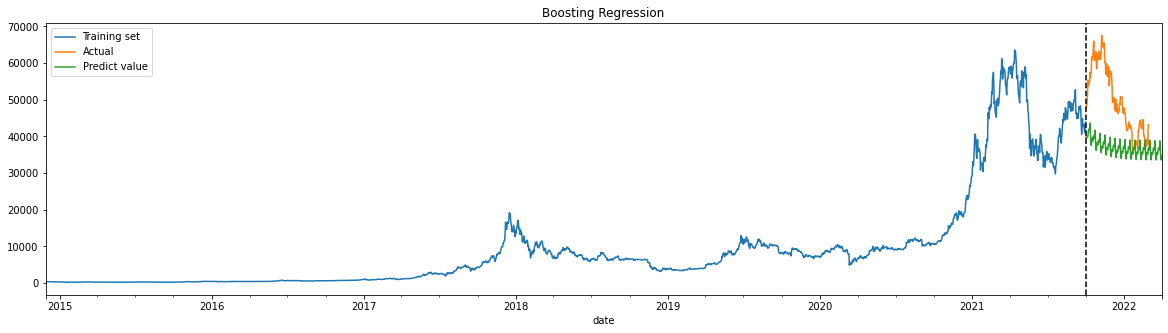

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Boosting Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

In [ ]:
valueAcc()

In [ ]:
trendAcc()

## Sarima model

In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
test=test.drop(['predict'],axis=1)
x=train[['year','month','date']]
y=train['close']

In [ ]:
model = auto_arima(y=y,
                   X=x
                   ,seasonal=True
                   ,m=12)

In [ ]:
testdf=test.drop('close',axis=1)

In [ ]:
test

In [ ]:
predict = model.predict(n_periods = 183,X=testdf)
test['predict']=predict.tolist()

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='Boosting Regression')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_predicted=np.array(predict)
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

In [ ]:
print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

In [ ]:
valueAcc()

In [ ]:
trendAcc()

## LTSM


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df=pd.read_csv('BTC-Daily.csv')
df=df.drop(['unix','symbol','open','high','low','Volume BTC','Volume USD'],axis=1)
df.date=pd.to_datetime(df.date,
                        infer_datetime_format=True)
df = df.sort_values(by="date")
df.index=df['date']
df=df.drop(['date'],axis=1)

In [ ]:
train = df.loc[df.index < '10-01-2021']
test = df.loc[(df.index >= '10-01-2021')]

In [ ]:
train['year']=train.index.year
train['month']=train.index.month
train['date']=train.index.day
test['year']=test.index.year
test['month']=test.index.month
test['date']=test.index.day

x_train=train[['year','month','date']]
y_train=train['close']
x_test=test[['year','month','date']]
y_test=test['close']

In [ ]:
data=np.array(df.values)

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [ ]:
x_train,y_train=[],[]
for i in range(30,len(train)):
  x_train.append(sc_train[i-30:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
x_train

[array([0.00317937, 0.0031859 , 0.00313575, 0.00321068, 0.00322344,
        0.00318516, 0.00301497, 0.00315964, 0.00316142, 0.00318812,
        0.00300622, 0.00279671, 0.0027617 , 0.00277431, 0.00285591,
        0.00281096, 0.00279196, 0.00279196, 0.00249299, 0.00236064,
        0.00222814, 0.00231464, 0.00249254, 0.00239106, 0.00250041,
        0.00257415, 0.00237607, 0.00233527, 0.00250575, 0.00228334]),
 array([0.0031859 , 0.00313575, 0.00321068, 0.00322344, 0.00318516,
        0.00301497, 0.00315964, 0.00316142, 0.00318812, 0.00300622,
        0.00279671, 0.0027617 , 0.00277431, 0.00285591, 0.00281096,
        0.00279196, 0.00279196, 0.00249299, 0.00236064, 0.00222814,
        0.00231464, 0.00249254, 0.00239106, 0.00250041, 0.00257415,
        0.00237607, 0.00233527, 0.00250575, 0.00228334, 0.00229432]),
 array([0.00313575, 0.00321068, 0.00322344, 0.00318516, 0.00301497,
        0.00315964, 0.00316142, 0.00318812, 0.00300622, 0.00279671,
        0.0027617 , 0.00277431, 0.00285591, 

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

Xây dựng

In [ ]:
model=Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
save_model = "save_model.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100, batch_size=30,verbose=2,callbacks=[best_model])


Epoch 1/100

Epoch 1: loss improved from inf to 0.02979, saving model to save_model.hdf5
83/83 - 21s - loss: 0.0298 - 21s/epoch - 254ms/step
Epoch 2/100

Epoch 2: loss improved from 0.02979 to 0.02105, saving model to save_model.hdf5
83/83 - 5s - loss: 0.0210 - 5s/epoch - 59ms/step
Epoch 3/100

Epoch 3: loss did not improve from 0.02105
83/83 - 5s - loss: 0.0218 - 5s/epoch - 59ms/step
Epoch 4/100

Epoch 4: loss improved from 0.02105 to 0.01916, saving model to save_model.hdf5
83/83 - 5s - loss: 0.0192 - 5s/epoch - 58ms/step
Epoch 5/100

Epoch 5: loss improved from 0.01916 to 0.01889, saving model to save_model.hdf5
83/83 - 5s - loss: 0.0189 - 5s/epoch - 59ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01889 to 0.01775, saving model to save_model.hdf5
83/83 - 5s - loss: 0.0178 - 5s/epoch - 58ms/step
Epoch 7/100

Epoch 7: loss improved from 0.01775 to 0.01745, saving model to save_model.hdf5
83/83 - 5s - loss: 0.0175 - 5s/epoch - 59ms/step
Epoch 8/100

Epoch 8: loss improved from 0.0

In [ ]:
y_train=sc.inverse_transform(y_train)
final_model=load_model('save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

78/78 [==============================] - 3s 25ms/step


In [ ]:
test=df[len(train)-30:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(30,test.shape[0]):
  x_test.append(sc_test[i-30:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


y_test=data[1650:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

5/5 [==============================] - 0s 23ms/step


<function matplotlib.pyplot.show(*args, **kw)>

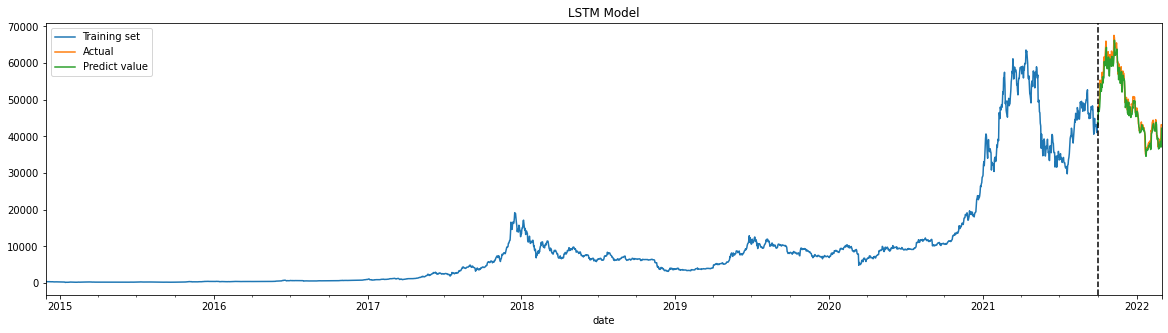

In [ ]:
predict=test['predict']
fig,ax = plt.subplots(figsize=(20,5))
train['close'].plot(ax=ax, label='Training set',title='LSTM Model')
test['close'].plot(ax=ax,label='actual')
predict.plot(ax=ax,label='Predict value')
ax.axvline('10-01-2021',color='Black',ls='--')
ax.legend(['Training set','Actual','Predict value'])
plt.show

In [ ]:
y_actual=np.array(test.close)

In [ ]:
y_predicted=np.array(test_datal['predict'])
y_predicted = y_predicted[~np.isnan(y_predicted)]
y_predicted=y_predicted[:152]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2088.4607151623522


In [ ]:
 print("np array :", 
          calculate_mape(y_actual,
                         y_predicted), "%")

np array : 3.21 %
